In [9]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./ab_test_data.csv')

data.head(2)

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00


In [3]:
X_con = data.groupby("group")["click"].sum().loc["con"]
X_exp = data.groupby("group")["click"].sum().loc["exp"]

print(data.groupby("group")["click"].sum())
print("Number of CLicks in Control: ", X_con)
print("Number of CLicks in Experimental: ", X_exp)

group
con    1989
exp    6116
Name: click, dtype: int64
Number of CLicks in Control:  1989
Number of CLicks in Experimental:  6116


In [4]:
alpha = 0.05
print("Alpha: significance level is:", alpha )


Alpha: significance level is: 0.05


In [6]:
N_con = len(data[data["group"] == 'con'])
N_exp = len(data[data["group"] == 'exp'])


p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp
print("Click Probability in Control Group:", p_con_hat)
print("Click Probability in Experimental Group:", p_exp_hat)

p_pooled_hat = (X_con+X_exp)/(N_con + N_exp)

pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/N_con + 1/N_exp)
print("p^_pooled is: ", p_pooled_hat)
print("pooled_variance is: ", pooled_variance)

SE = np.sqrt(pooled_variance)
print("Standard Error is: ", SE)

Test_stat = (p_con_hat - p_exp_hat)/SE
print("Test Statistics for 2-sample Z-test is:", Test_stat)

Z_crit = norm.ppf(1-alpha/2)
print("Z-critical value from Standard Normal distribution: ", Z_crit)

p_value = 2 * norm.sf(abs(Test_stat))
print("P-value of the 2-sample Z-test: ",round(p_value,3))

Click Probability in Control Group: 0.1989
Click Probability in Experimental Group: 0.6116
p^_pooled is:  0.40525
pooled_variance is:  4.82044875e-05
Standard Error is:  0.006942945160376826
Test Statistics for 2-sample Z-test is: -59.44163326469381
Z-critical value from Standard Normal distribution:  1.959963984540054
P-value of the 2-sample Z-test:  0.0


In [7]:
CI = [round((p_exp_hat - p_con_hat) - SE*Z_crit,3), round((p_exp_hat - p_con_hat) + SE*Z_crit,3)]
print("Confidence Interval of the 2 sample Z-test is: ", CI)


Confidence Interval of the 2 sample Z-test is:  [0.399, 0.426]


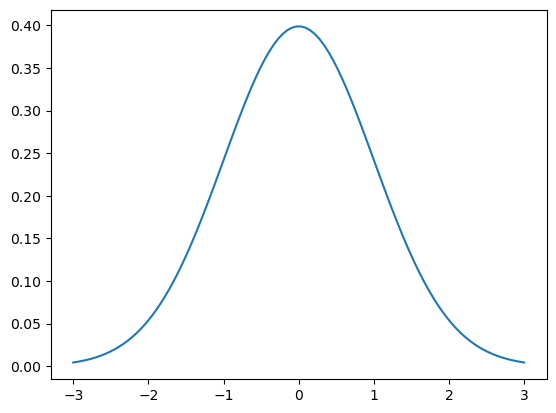

In [10]:
mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

Test_stat = -42.71219397822086  # This value is from your A/B test results
Z_crit = 1.959963984540054  # Z-critical value for a 5% significance level in a two-tailed test

plt.plot(x, y, label='Standard Normal Distribution')

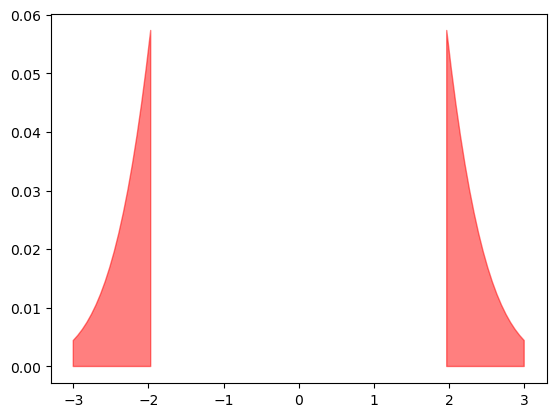

In [11]:
plt.fill_between(x, y, where=(x > Z_crit) | (x < -Z_crit), color='red', alpha=0.5, label='Rejection Region')

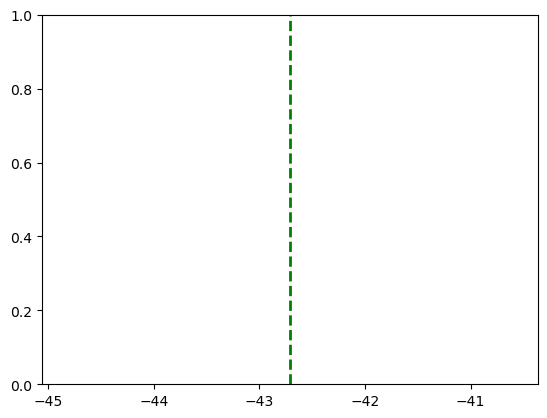

In [12]:
plt.axvline(Test_stat, color='green', linestyle='dashed', linewidth=2, label=f'Test Statistic = {Test_stat:.2f}')

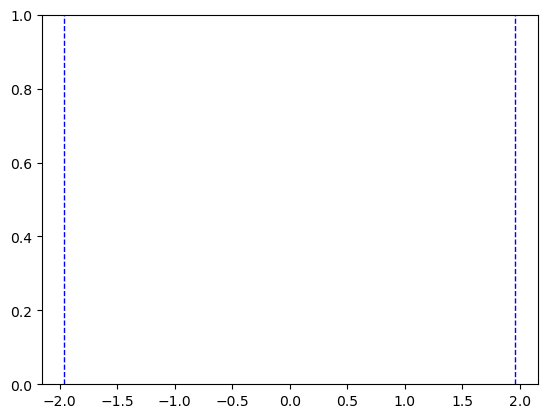

In [13]:
plt.axvline(Z_crit, color='blue', linestyle='dashed', linewidth=1, label=f'Z-critical = {Z_crit:.2f}')
plt.axvline(-Z_crit, color='blue', linestyle='dashed', linewidth=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


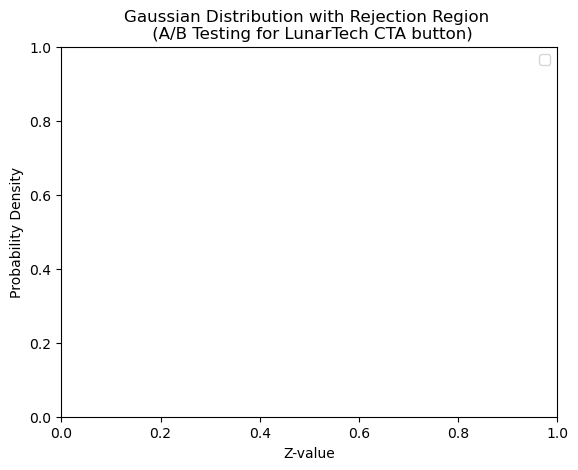

In [14]:
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with Rejection Region \n (A/B Testing for LunarTech CTA button)')
plt.legend()

plt.show()